In [1]:
import pandas as pd
from scipy import stats as stat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('walmart_data.txt')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
#size of data set
df.shape

(550068, 10)

In [5]:
#we dont have any nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
#Numeric variable
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
#catagorecal variable
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


#### User_ID:

In [8]:
df['User_ID']

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64

In [9]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [10]:
#this user id has highest num of purchases 
df[df['User_ID']==1001680]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
11055,1001680,P00036742,M,26-35,20,A,3,1,1,15670
11056,1001680,P00130642,M,26-35,20,A,3,1,11,6139
11057,1001680,P00105442,M,26-35,20,A,3,1,11,7607
11058,1001680,P00245642,M,26-35,20,A,3,1,5,8715
11059,1001680,P00123342,M,26-35,20,A,3,1,11,4472
...,...,...,...,...,...,...,...,...,...,...
517447,1001680,P00238742,M,26-35,20,A,3,1,13,774
517448,1001680,P00146742,M,26-35,20,A,3,1,1,4227
517449,1001680,P00285042,M,26-35,20,A,3,1,16,4825
517450,1001680,P00047742,M,26-35,20,A,3,1,16,12539


In [11]:
#unique no of customer
df['User_ID'].nunique()

5891

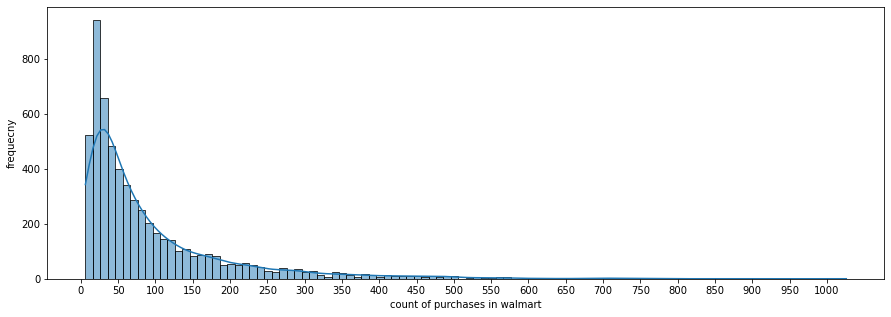

In [12]:
#x-axis is the user-id counts 
#y-axis is the freq of the counts
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['User_ID'].value_counts(),kde=True,ax=ax)

plt.xlabel('count of purchases in walmart')
plt.ylabel('frequecny')
plt.xticks([x for x in range(0,1026,50)])
plt.show()

x-axis is count of purchases in walmart

y-axis is the frequency

most of the users have purchase history of around 0-50 purchases in walmert


#### Product_ID

In [13]:
df['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

In [14]:
#there are 3631 unique products in walmart
df['Product_ID'].nunique()

3631

In [15]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00167342       1
P00091742       1
P00357542       1
P00053242       1
P00364542       1
Name: Product_ID, Length: 3631, dtype: int64

In [16]:
top_10=pd.DataFrame(df['Product_ID'].value_counts()[:10]).reset_index()

Text(0, 0.5, 'frequecny')

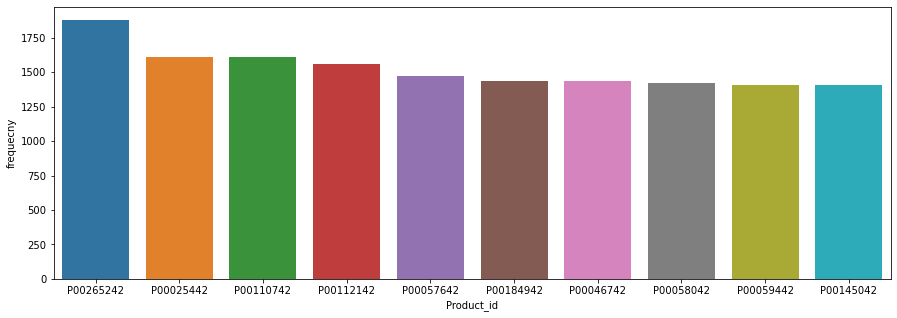

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=top_10['index'],y=top_10['Product_ID'])
plt.xlabel('Product_id')
plt.ylabel('frequecny')

Top 10 products 

customers perfer buying product_id P00265242 more



#### Gender:

In [18]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [19]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

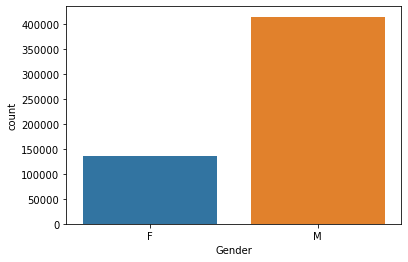

In [20]:
sns.countplot(df['Gender'])

Males tends to buy more

#### Age:

In [21]:
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object

In [22]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

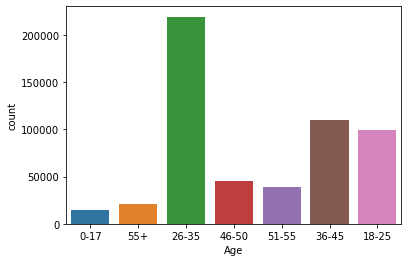

In [23]:
sns.countplot(df['Age'])

Age between 26-35 years tends to buy more 

#### Occupation

In [24]:
df['Occupation']

0         10
1         10
2         10
3         10
4         16
          ..
550063    13
550064     1
550065    15
550066     1
550067     0
Name: Occupation, Length: 550068, dtype: int64

In [25]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [26]:
# there about 21 occupation catagoery
df['Occupation'].nunique()

21

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

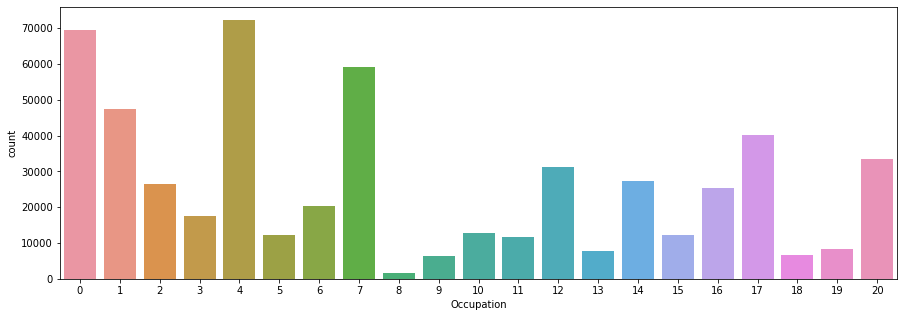

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df['Occupation'])

customers having occupational catagorery as 4,0,7 tends to buy more

#### City_Category:

In [28]:
df['City_Category']

0         A
1         A
2         A
3         A
4         C
         ..
550063    B
550064    C
550065    B
550066    C
550067    B
Name: City_Category, Length: 550068, dtype: object

In [29]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [30]:
df['City_Category'].nunique()

3

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

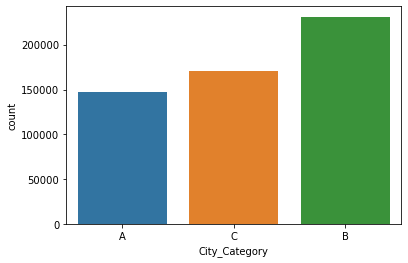

In [31]:
sns.countplot(df['City_Category'])

Customers from city B tends to buy more

In [32]:
df['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [33]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [34]:
df['Stay_In_Current_City_Years'].nunique()

5

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

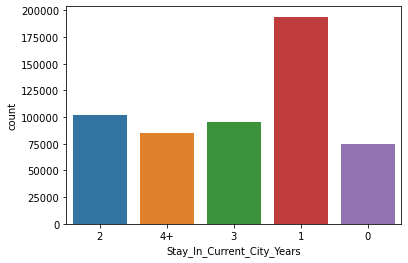

In [35]:
sns.countplot(df['Stay_In_Current_City_Years'])

Customers who stayed 1 year in current city tends to buy more

#### Marital_Status

In [36]:
df['Marital_Status']

0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: Marital_Status, Length: 550068, dtype: int64

In [37]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [38]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

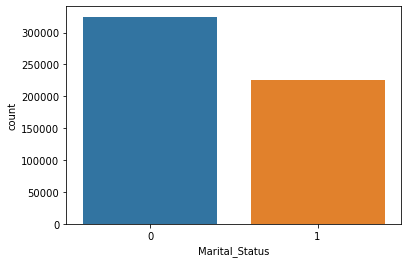

In [39]:
sns.countplot(df['Marital_Status'])

customers having marital status as 0 tends to buy more 

#### ProductCategory

In [40]:
df['Product_Category']

0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category, Length: 550068, dtype: int64

In [41]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [42]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [43]:
df['Product_Category'].nunique()

20

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

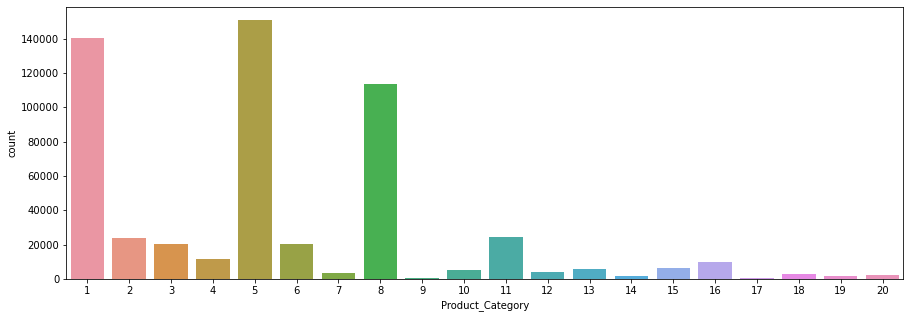

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df['Product_Category'])

Customers tends to buy product_category 5,1,8 more 

In [45]:
# counts of unique products in each product_catagoery
df_cat_prod=pd.DataFrame(df.groupby(df['Product_Category'])['Product_ID'].nunique()).reset_index()

Text(0, 0.5, 'unique product count')

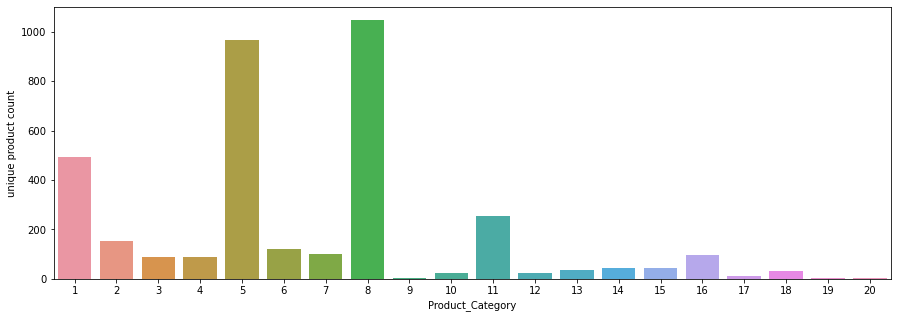

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=df_cat_prod['Product_Category'],y=df_cat_prod['Product_ID'])
plt.ylabel('unique product count')

product category 8 have highest number of unique products in walmaert

#### Purchase:

In [47]:
df['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [48]:
df['Purchase'].mean()

9263.968712959126

In [49]:
df['Purchase'].min()

12

In [50]:
df['Purchase'].max()

23961

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

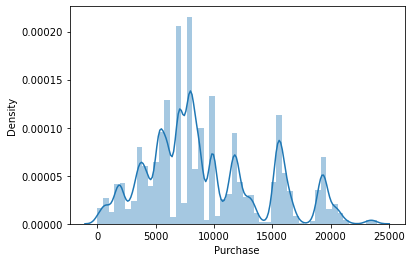

In [51]:
#drist of purchase price 
sns.distplot(df['Purchase'])

### Bivariate

In [52]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Since we have only one countinous column we cannot buid corelation matrix

#### Cross tabs ( with respective to mean of purchace)

In [53]:
def cross_tabs(x,y):
    df_c_age_gender=pd.crosstab(df[x],df[y],values=df['Purchase'],aggfunc=np.mean,margins=True)
    print(df_c_age_gender)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df_c_age_gender,cmap="YlGnBu")

Gender            F            M          All
Age                                          
0-17    8338.771985  9235.173670  8933.464640
18-25   8343.180201  9440.942971  9169.663606
26-35   8728.251754  9410.337578  9252.690633
36-45   8959.844056  9453.193643  9331.350695
46-50   8842.098947  9357.471509  9208.625697
51-55   9042.449666  9705.094802  9534.808031
55+     9007.036199  9438.195603  9336.280459
All     8734.565765  9437.526040  9263.968713


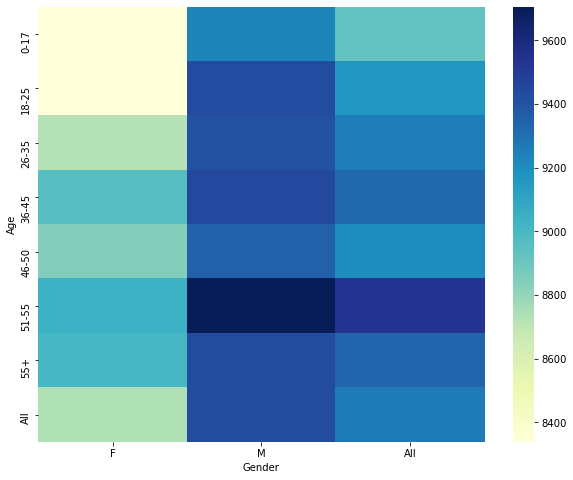

In [54]:
cross_tabs('Age','Gender')

we can observer here that customer who's age is btw 51-55 and gender =male tends to have more purchase mean

Pruchase mean(Male) > Purchace mean(Female)

Pruchase mean(age=51-55) > then remaining catagoery





Occupation            0            1            2            3            4  \
Age                                                                           
0-17        9305.183224  8751.248062  8416.319444          NaN  9431.964602   
18-25       9167.149863  8524.334031  8443.224565  9846.722043  9153.604776   
26-35       9113.090048  8961.626468  9161.169375  8906.152102  9337.273215   
36-45       9356.152169  8856.423113  8719.387035  9280.210616  9414.961649   
46-50       8391.753788  8991.659331  8957.813559  9483.148843  7781.914729   
51-55       8954.350282  9366.317234  9276.491071  9050.461609  9335.269076   
55+         9461.835075  9074.359350  9479.487685  9442.193350          NaN   
All         9124.428588  8953.193270  8952.481683  9178.593088  9213.980251   

Occupation             5            6             7             8  \
Age                                                                 
0-17                 NaN          NaN  10509.791367  10485.862069   
18

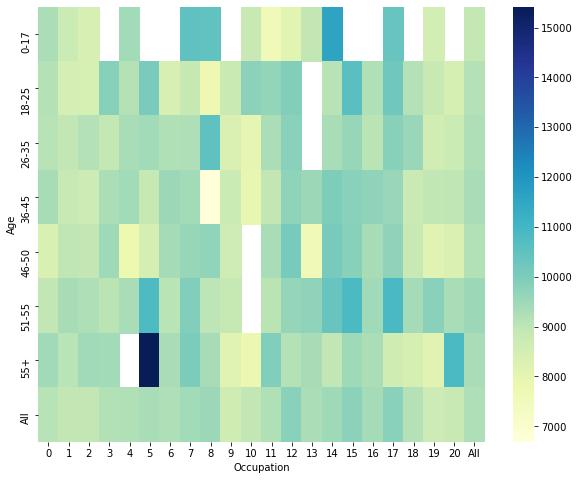

In [55]:
cross_tabs('Age','Occupation')

age=55+ and occupation =5  have highest purchase mean


In [56]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

City_Category            A            B            C          All
Age                                                              
0-17           8615.110456  8917.295308  9059.503299  8933.464640
18-25          8833.734084  9031.706985  9696.570919  9169.663606
26-35          8952.503004  9149.193178  9835.388993  9252.690633
36-45          8990.333997  9107.901067  9882.012654  9331.350695
46-50          8348.526752  9247.927129  9533.184023  9208.625697
51-55          9508.505001  9340.911392  9780.380806  9534.808031
55+            8485.945424  9803.560635  9385.316939  9336.280459
All            8911.939216  9151.300563  9719.920993  9263.968713


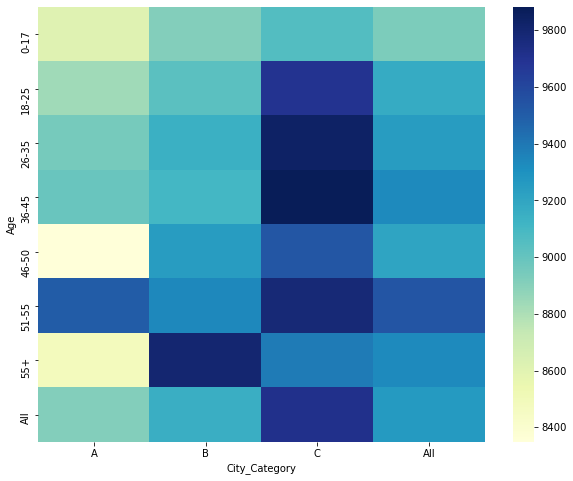

In [57]:
cross_tabs('Age','City_Category')

City_cat=C has highest purchase mean then compared to rest of them

Age=36-45 and city_cat =c has highest concentraion of purchase mean


Marital_Status            0            1          All
Age                                                  
0-17            8933.464640          NaN  8933.464640
18-25           9216.752419  8994.509992  9169.663606
26-35           9252.566484  9252.882410  9252.690633
36-45           9402.515329  9223.098451  9331.350695
46-50           8956.529551  9305.535821  9208.625697
51-55           9575.827475  9518.735088  9534.808031
55+             9539.774959  9218.510315  9336.280459
All             9265.907619  9261.174574  9263.968713


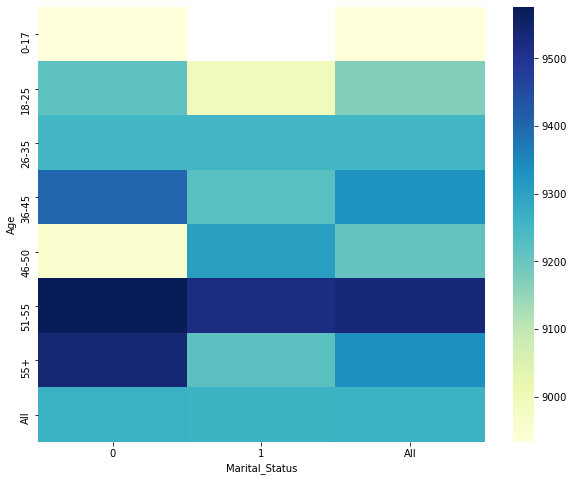

In [58]:
cross_tabs('Age','Marital_Status')

purchase mean( marital =0) is nearly equal to purchase mean( matrial =1)

marital=0 and age =51-55 have highest purchase mean

Age                       0-17         18-25         26-35         36-45  \
Product_Category                                                           
1                 13607.600279  13448.852904  13456.256056  13767.068287   
2                 10851.982609  10966.741870  11083.914427  11375.946254   
3                  9431.505000   9871.727601  10154.785043  10340.294240   
4                  2244.659631   2194.358912   2340.182729   2400.508496   
5                  6249.356120   6142.584040   6176.736014   6283.077612   
6                 15982.842105  15768.623900  15758.713848  15803.359323   
7                 15490.830189  16062.850312  16341.205330  16450.993820   
8                  7632.767493   7387.642287   7400.653900   7528.592033   
9                 15434.875000  17127.650794  15673.753247  14689.448598   
10                20038.495495  19192.218905  19560.216004  19651.978138   
11                 4808.166216   4597.116163   4677.053069   4762.744195   
12          

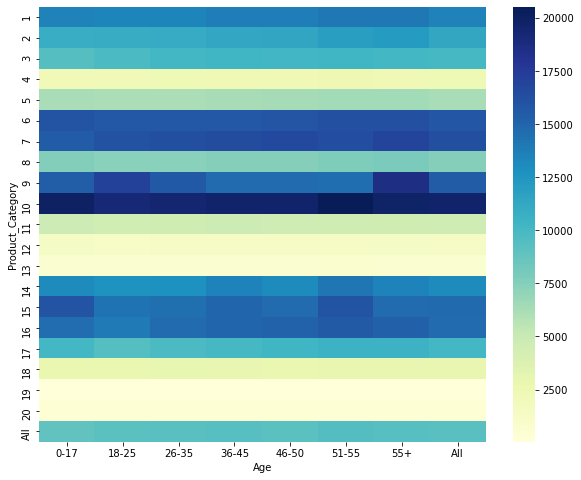

In [60]:
cross_tabs('Product_Category','Age')

### Outlier 

since purchase is the only countinous variable we will check that

In [61]:
def detetct_out(df,a):
    q1=np.quantile(df[a],0.25)
    q3=np.quantile(df[a],0.75)
    low_end=q1-1.5*(q3-q1)
    high_end=q3+1.5*(q3-q1)
    b=df[df[a]>high_end][a].tolist()
    c=df[df[a]<low_end][a].tolist()
    b=set(b)
    c=set(c)
    print("Outliers")
    print("Outliers which has high values --->",b)
    print("---------------------------------------------------")
    print("Outliers which has low values --->",c)

In [62]:
detetct_out(df,'Purchase')

Outliers
Outliers which has high values ---> {23610, 23612, 23624, 23856, 23630, 22651, 22656, 22666, 22668, 22678, 22684, 22710, 22719, 22730, 22743, 23724, 22791, 22795, 22803, 23485, 22814, 22816, 22823, 22846, 22848, 22852, 22855, 22858, 22864, 22871, 21425, 22902, 22913, 22919, 22942, 22946, 22963, 22976, 22984, 22989, 22990, 22994, 21429, 23006, 23482, 23029, 23040, 23041, 23042, 23043, 23044, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23075, 23076, 23077, 23466, 23080, 23081, 23082, 23083, 23084, 23085, 23086, 23087, 23088, 23089, 23090, 23091, 23092, 23094, 23095, 23096, 23097, 23098, 23099, 23101, 23102, 23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23111, 23112, 23113, 23114, 23115, 23116, 23117, 23118, 23119, 23120, 23121, 23122, 23123, 23124, 23125, 23126, 23127, 23128, 23129, 23130, 23131, 23132, 23

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

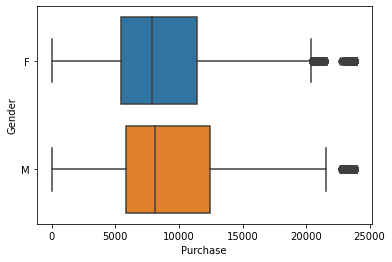

In [63]:
sns.boxplot(x=df['Purchase'],y=df['Gender'])

<AxesSubplot:xlabel='Purchase'>

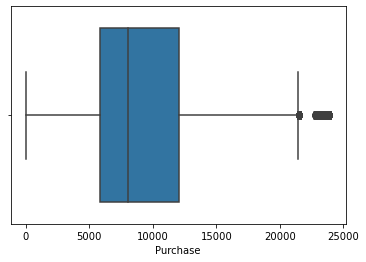

In [64]:
sns.boxplot(x=df['Purchase'])

<AxesSubplot:xlabel='Purchase', ylabel='Age'>

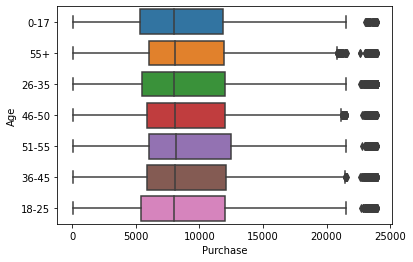

In [65]:
sns.boxplot(x=df['Purchase'],y=df['Age'])

<AxesSubplot:xlabel='Purchase', ylabel='City_Category'>

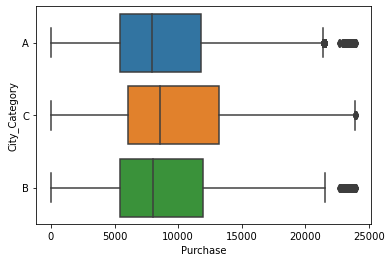

In [66]:
sns.boxplot(x=df['Purchase'],y=df['City_Category'])

#### Are women spending more money per transaction than men? Why or Why not?

In [67]:
df_male=df[df['Gender']=='M']
df_fmale=df[df['Gender']=='F']

By this density graph we can say that males spend more moeny per transaction than female 

But these dist doesnt follow gaussian 

In [68]:
# this is the boot strap fuction which gives us the list_of_means
def boot_strap(data,sample_size,no_of_samples):
    list_of_means11 = []
    for i in range(no_of_samples):
        bootstrapped_samples = np.random.choice(data, size=sample_size)
        list_of_means11.append(np.mean(bootstrapped_samples))
    return list_of_means11

In [69]:
male_means=boot_strap(df_male['Purchase'],2000,2000)
fmale_means=boot_strap(df_fmale['Purchase'],2000,2000)

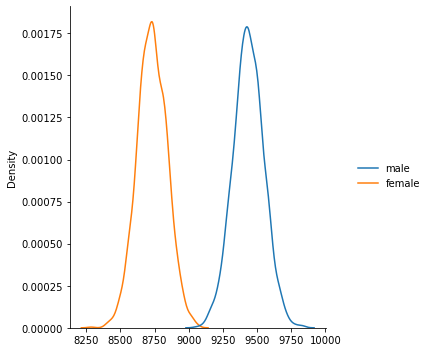

In [70]:
a=sns.displot({'male':male_means,'female':fmale_means},kind='kde')

Seeing above plot we can say that mean_purchase_amount_per_trans(female)<mean_purchase_amount_per_trans(male)

for sample size=2000

These data are for each transactions 

#### Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [71]:
df_male_expense=df

In [72]:
#total expense of each user
# filter by gender and group by userid  agg as purchase mean
#this data is for each customers
df_male_agg=pd.DataFrame(df_male.groupby(df['User_ID'])['Purchase'].mean()).reset_index()
df_fmale_agg=pd.DataFrame(df_fmale.groupby(df['User_ID'])['Purchase'].mean()).reset_index()


In [73]:
df_male_agg['Purchase'].mean()

9806.867524226633

In [74]:
df_fmale_agg['Purchase'].mean()

8965.198463936456

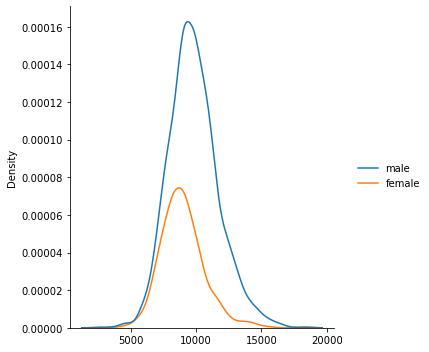

In [75]:
a=sns.displot({'male':df_male_agg['Purchase'],'female':df_fmale_agg['Purchase']},kind='kde')

In [76]:
male_means_agg=boot_strap(df_male_agg['Purchase'],1000,1000)
fmale_means_agg=boot_strap(df_fmale_agg['Purchase'],1000,1000)

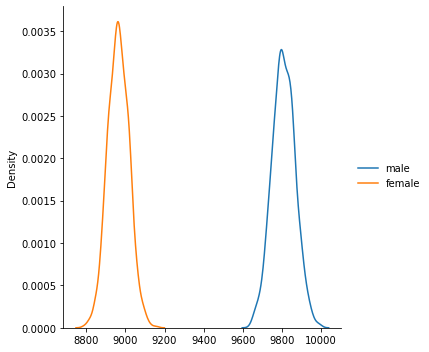

In [77]:
a=sns.displot({'male':male_means_agg,'female':fmale_means_agg},kind='kde')

In [78]:
np.mean(fmale_means_agg)


8964.14790818968

In [79]:
np.mean(male_means_agg)

9808.562081287442

Seeing above plot we can say that mean_expense(female)<mean_expense(male)

In [80]:
#this gives a confidnce interval
def Confidance_interverl(list_ofmeans,left_val,right_val):
    left = np.percentile(list_ofmeans, 2.5)
    right = np.percentile(list_ofmeans, 97.5)
    return left,right

In [81]:
def Boot_Strap_Main(data,sample_size,no_of_samples,CI_left,CI_right):
    list_of_means=boot_strap(data,sample_size,no_of_samples)
    left,right=Confidance_interverl(list_of_means,CI_left,CI_right)
    diff_left_right=right-left
    print("Sample Size =",sample_size)
    print("no_of_samples =",no_of_samples)
    print("Confidence interval: ", [left, right])
    print("difference",diff_left_right)
    return diff_left_right,left,right,list_of_means
    #sns.histplot(list_of_means)

####  confidence Interval for CI=95 


In [82]:
#male 

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_male_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)

Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9695.785767042229, 9933.130500112686]
difference 237.34473307045664


In [83]:
#male 

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_male_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=2.5,CI_right=97.5)

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [9724.77720180956, 9895.708049377508]
difference 170.93084756794815


In [84]:
#male 

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_male_agg['Purchase'],sample_size=3000,no_of_samples=3000,CI_left=2.5,CI_right=97.5)

Sample Size = 3000
no_of_samples = 3000
Confidence interval:  [9740.976465217387, 9876.401658896211]
difference 135.42519367882414


In [85]:
#female

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_fmale_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)

Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [8865.583416769196, 9072.401911990624]
difference 206.81849522142875


In [86]:
#female

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_fmale_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=2.5,CI_right=97.5)

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [8893.002292525807, 9039.765151241858]
difference 146.7628587160507


In [87]:
#female

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_fmale_agg['Purchase'],sample_size=3000,no_of_samples=3000,CI_left=2.5,CI_right=97.5)

Sample Size = 3000
no_of_samples = 3000
Confidence interval:  [8905.464480920102, 9025.165019475422]
difference 119.70053855532024


As the sample size increase the range of the CI will become shorter 


#### confidence Interval for CI=90

In [88]:
#male 

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_male_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=5,CI_right=95)


Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9697.242159777115, 9922.12545115513]
difference 224.8832913780152


In [89]:
#male 

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_male_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=5,CI_right=95)


Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [9722.906920377265, 9890.760087585371]
difference 167.85316720810624


In [90]:
#female

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_fmale_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=5,CI_right=95)

Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [8863.905741319242, 9072.589449924466]
difference 208.68370860522373


In [91]:
#female

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_fmale_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=5,CI_right=95)

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [8891.516362658947, 9038.795940008627]
difference 147.27957734968004


From the above bootstrap experiment we can say that 

expense_of_male>expense_of_fmale

We have gving CI for different sample sizes and diff no_of_sample

FOR EXMP:

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [8893.661760614004, 9042.044923426136]
difference 148.38316281213156

we are 95% condifence that the population of female expense lie btween [8893.661760614004, 9042.044923426136] 

####  Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

male:

Sample Size = 1000

no_of_samples = 1000

Confidence interval:  [9691.280523604808, 9923.624993824715]

difference 232.34447021990673



Sample Size = 2000

no_of_samples = 2000

Confidence interval:  [9725.1728787738, 9889.376693510063]

difference 164.20381473626367


female:

Sample Size = 1000

no_of_samples = 1000

Confidence interval:  [8860.035528719416, 9068.177174773075]

difference 208.1416460536584


Sample Size = 2000

no_of_samples = 2000

Confidence interval:  [8893.661760614004, 9042.044923426136]

difference 148.38316281213156



we see here that CI of avg male and avg female spending does not over lap 

the spending habbits of males and females are different

walmart should show diff offers for males and diff for females customers


#### Results when the same activity is performed for Married vs Unmarried  

In [92]:
df_unmarried=df[df['Marital_Status']==0]
df_married=df[df['Marital_Status']==1]

In [93]:
df_unmarried['Purchase'].mean()

9265.907618921507

In [94]:
df_married['Purchase'].mean()

9261.174574082374

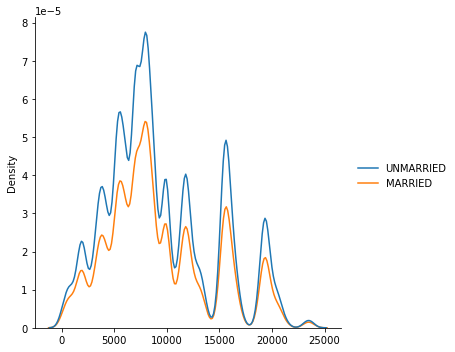

In [95]:
a=sns.displot({'UNMARRIED':df_unmarried['Purchase'],'MARRIED':df_married['Purchase']},kind='kde')

By this density graph we cannot say that unmarried spend more money per transaction than married

In [96]:
# this is the boot strap fuction which gives us the list_of_means
def boot_strap(data,sample_size,no_of_samples):
    list_of_means11 = []
    for i in range(no_of_samples):
        bootstrapped_samples = np.random.choice(data, size=sample_size)
        list_of_means11.append(np.mean(bootstrapped_samples))
    return list_of_means11

In [97]:
unmarried_df=boot_strap(df_unmarried['Purchase'],1000,1000)
married_df=boot_strap(df_married['Purchase'],1000,1000)

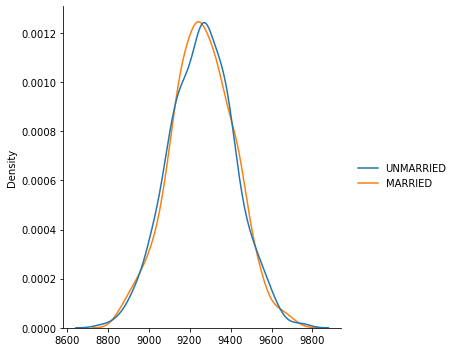

In [98]:
a=sns.displot({'UNMARRIED':unmarried_df,'MARRIED':married_df},kind='kde')

both married and unmarried have mean_purchase_per_trans

their spending habbits are all most same

In [99]:
#total expense of each user
# filter by marital and group by userid  agg as purchase mean
#this data is for each customers
df_married_agg=pd.DataFrame(df_married.groupby(df['User_ID'])['Purchase'].mean()).reset_index()
df_unmarried_agg=pd.DataFrame(df_unmarried.groupby(df['User_ID'])['Purchase'].mean()).reset_index()


In [100]:
df_married_agg['Purchase'].mean()

9574.96229903175

In [101]:
df_unmarried_agg['Purchase'].mean()

9564.407141636288

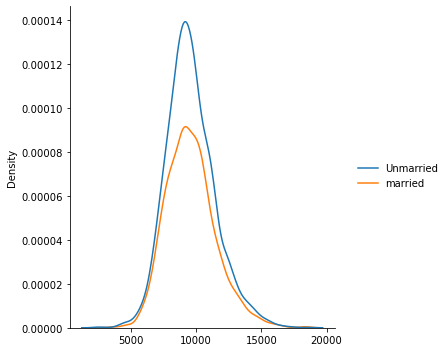

In [102]:
a=sns.displot({'Unmarried':df_unmarried_agg['Purchase'],'married':df_married_agg['Purchase']},kind='kde')

In [103]:
unmarried_means_agg=boot_strap(df_unmarried['Purchase'],1000,1000)
married_means_agg=boot_strap(df_married['Purchase'],1000,1000)

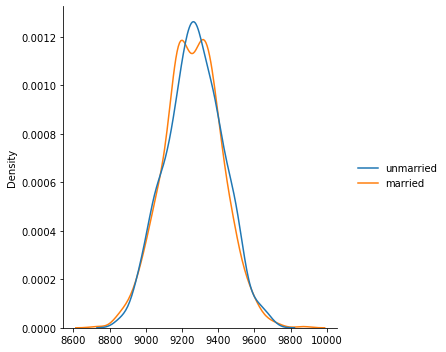

In [104]:
a=sns.displot({'unmarried':unmarried_means_agg,'married':married_means_agg},kind='kde')

####  confidence Interval for CI=95 

In [105]:
#unmarried

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_unmarried_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)

Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9453.970767662451, 9680.16655655537]
difference 226.19578889291915


In [106]:
#unmarried

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_unmarried_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=2.5,CI_right=97.5)

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [9480.19275685655, 9647.901860109312]
difference 167.70910325276236


In [107]:
#married

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_married_agg['Purchase'],sample_size=1000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)

Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9450.577918379573, 9693.48242479901]
difference 242.90450641943607


In [108]:
#married

diff_left_right,left,right,list_of_means=Boot_Strap_Main(df_married_agg['Purchase'],sample_size=2000,no_of_samples=2000,CI_left=2.5,CI_right=97.5)

Sample Size = 2000
no_of_samples = 2000
Confidence interval:  [9492.45794465459, 9660.311567213]
difference 167.85362255841028


From the above bootstrapping we can say that expense of both married and unmarried are having same dristribution

Popultion mean of married people lie in [9492.437336895322, 9655.03598509862] with Confidence of 95%

Popultion mean of unmarried people lie in [9480.699752043949, 9646.014401806344] with Confidence of 95%

we see that there is clear overlapping btw the two dirstibution , which means these people are having same spending pattern

Walmart can send same offers or products to these segments 

### Results when the same activity is performed for Age

In [109]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [110]:
df_age_0_17=df[df['Age']=='0-17']
df_age_18_25=df[df['Age']=='18-25']
df_age_26_35=df[df['Age']=='26-35']
df_age_36_45=df[df['Age']=='36-45']
df_age_46_50=df[df['Age']=='46-50']
df_age_51_55=  df[df['Age']=='51-55']
df_age_55plus=df[df['Age']=='55+']

In [111]:
d={'0-17':df_age_0_17['Purchase'],'18-25':df_age_18_25['Purchase'],'26_35':df_age_26_35['Purchase'],'36-45':df_age_36_45['Purchase'],'46-50':df_age_46_50['Purchase'],'51-50':df_age_51_55['Purchase'],'50+':df_age_55plus['Purchase']}

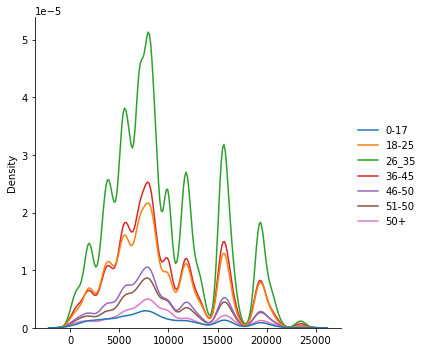

In [112]:
a=sns.displot(d,kind='kde')

By this density we cannot conclude anything for now

In [113]:
df_age_0_17_df=boot_strap(df_age_0_17['Purchase'],1000,1000)
df_age_18_25_df=boot_strap(df_age_18_25['Purchase'],1000,1000)
df_age_26_35_df=boot_strap(df_age_26_35['Purchase'],1000,1000)
df_age_36_45_df=boot_strap(df_age_36_45['Purchase'],1000,1000)
df_age_46_50_df=boot_strap(df_age_46_50['Purchase'],1000,1000)
df_age_51_55_df=boot_strap(df_age_51_55['Purchase'],1000,1000)
df_age_55plus_df=boot_strap(df_age_55plus['Purchase'],1000,1000)

In [114]:
d1={'0-17':df_age_0_17_df,'18-25':df_age_18_25_df,'26_35':df_age_26_35_df,'36-45':df_age_36_45_df,'46-50':df_age_46_50_df,'51-50':df_age_51_55_df,'50+':df_age_55plus_df}

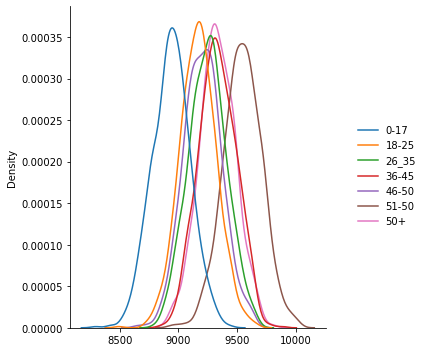

In [115]:

sns.displot(d1,kind='kde')

#####  Note : this distribution is for per each transaction 

from this plot we can observe that 0-17 group has less mean_purchase_per_trans

51-50 has more mean_purchase_per_trans

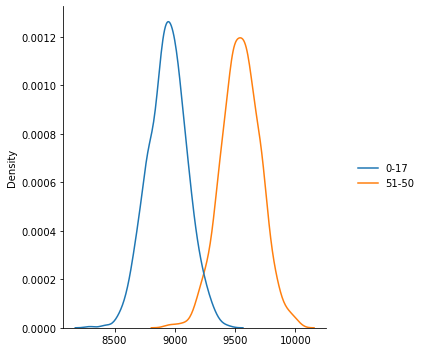

In [116]:
sns.displot({'0-17':d1['0-17'],'51-50':d1['51-50']},kind='kde')
    

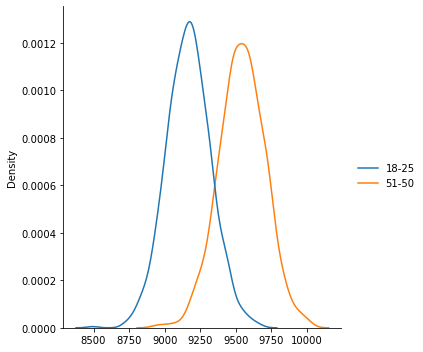

In [117]:
sns.displot({'18-25':d1['18-25'],'51-50':d1['51-50']},kind='kde')

In [118]:
c_a=[]
for i in d1:
    print(i,np.mean(d1[i]))
    c_a.append((i,np.mean(d1[i])))

0-17 8937.591179000001
18-25 9168.293978
26_35 9247.623647
36-45 9330.673756999999
46-50 9207.396045
51-50 9544.658206999999
50+ 9330.484889


In [119]:
c_a.sort(key=lambda x : x[1])
print("MEANS IN ACCENDING ORDER")
for i in c_a:
    print(i)

MEANS IN ACCENDING ORDER
('0-17', 8937.591179000001)
('18-25', 9168.293978)
('46-50', 9207.396045)
('26_35', 9247.623647)
('50+', 9330.484889)
('36-45', 9330.673756999999)
('51-50', 9544.658206999999)


form here we can see that age group of 18-25 26-35 46-50 have similar mean_purchase_per_trans

36-45 and 50+ have similar mean_purchase_per_trans



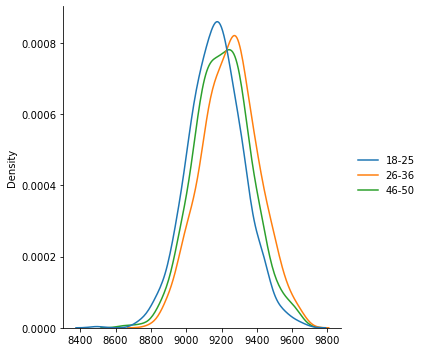

In [120]:
sns.displot({'18-25':d1['18-25'],'26-36':d1['26_35'],'46-50':d1['46-50']},kind='kde')

these three are having samilar mean_purchase_per_trans

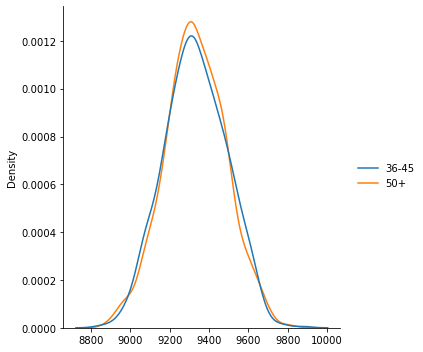

In [121]:
sns.displot({'36-45':d1['36-45'],'50+':d1['50+']},kind='kde')

these two are having samilar mean_purchase_per_trans




By all these observation we can say that :

18-25 26-35 46-50 ---> similar purchase habbit

36-45 and 50+   -----> similar purchase habbit

In [122]:
li=[df_age_0_17,df_age_18_25,df_age_26_35,df_age_36_45,df_age_46_50,df_age_51_55,df_age_55plus]
ki=['0-17','18-25',  '26-35', '36-45','46-50', '51-55', '55+' ]
dd_1={}
for i,j in zip(li,ki):
    caa=pd.DataFrame(i.groupby(df['User_ID'])['Purchase'].mean()).reset_index()
    dd_1[j]=caa
    

In [123]:
for i in dd_1:
    print(i,"--------->",dd_1[i]['Purchase'].mean())

0-17 ---------> 8986.31830504905
18-25 ---------> 9515.636520662487
26-35 ---------> 9607.126897629718
36-45 ---------> 9686.463039046288
46-50 ---------> 9565.974310115751
51-55 ---------> 9630.474319436778
55+ ---------> 9407.200822487683


In [124]:
dd_agg_val={}
for i in dd_1:
    dd_agg_val[i]=boot_strap(dd_1[i]['Purchase'],2000,1000)

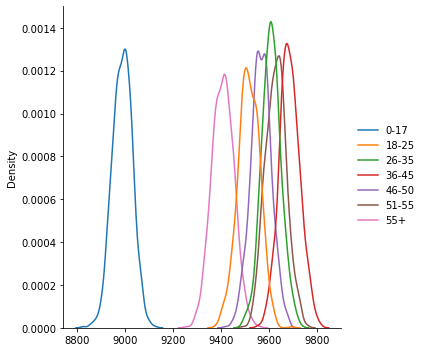

In [125]:
sns.displot(dd_agg_val,kind='kde')

By this plot be can say that age group 0-17 people has less expense 

age group 36-45 has more expense

####  Note : this distribution is for per each customer ( ie group by customer mean purchase),

#####  confidence Interval for CI=95 

In [126]:
for i in dd_agg_val:
    print(i)
    Boot_Strap_Main(dd_agg_val[i],sample_size=1000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)
    print("------------------------------------------------------------------------------------------------")
    

0-17
Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [8985.024506812832, 8989.932183423472]
difference 4.9076766106409195
------------------------------------------------------------------------------------------------
18-25
Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9512.345092769223, 9517.929874486354]
difference 5.5847817171306815
------------------------------------------------------------------------------------------------
26-35
Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9606.221232453303, 9611.381572302442]
difference 5.160339849138836
------------------------------------------------------------------------------------------------
36-45
Sample Size = 1000
no_of_samples = 1000
Confidence interval:  [9683.03618018958, 9688.192904407266]
difference 5.156724217686133
------------------------------------------------------------------------------------------------
46-50
Sample Size = 1000
no_of_samples = 1000
Confidence interval:  

In [127]:
for i in dd_agg_val:
    print(i)
    Boot_Strap_Main(dd_agg_val[i],sample_size=2000,no_of_samples=1000,CI_left=2.5,CI_right=97.5)
    print("------------------------------------------------------------------------------------------------")
    

0-17
Sample Size = 2000
no_of_samples = 1000
Confidence interval:  [8985.670922734364, 8989.200994276343]
difference 3.5300715419798507
------------------------------------------------------------------------------------------------
18-25
Sample Size = 2000
no_of_samples = 1000
Confidence interval:  [9513.099232797209, 9517.053659503894]
difference 3.954426706684899
------------------------------------------------------------------------------------------------
26-35
Sample Size = 2000
no_of_samples = 1000
Confidence interval:  [9607.048191911228, 9610.615217921533]
difference 3.5670260103051987
------------------------------------------------------------------------------------------------
36-45
Sample Size = 2000
no_of_samples = 1000
Confidence interval:  [9683.768751240566, 9687.157977561617]
difference 3.3892263210509554
------------------------------------------------------------------------------------------------
46-50
Sample Size = 2000
no_of_samples = 1000
Confidence interval:

From these observation we can say that :

age group 0-17 do not overlap with any other age group 

rest all the age group overlap with each other

We can say that population mean lies btw these given CI with confidence of 95%

expense of 0-17 is less when compared to all

expense of 36-45 is more

#### with  All these sample means with certain confidence interval , we can suggest that the population mean lies btw these CI, with certain confidence